https://www.kaggle.com/tongpython/cat-and-dog

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from IPython.display import Image, display

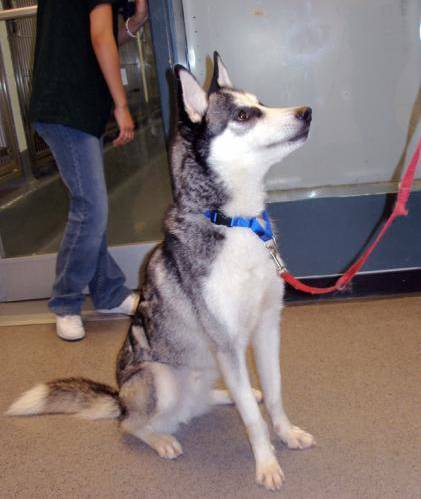

In [3]:
display(Image('cat-and-dog/test_set/dogs/dog.4001.jpg'))

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cat-and-dog/training_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('cat-and-dog/test_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
#fit the model
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
8000/8000 [==============================] - 1358s 170ms/step - loss: 0.3693 - acc: 0.8268 - val_loss: 0.5844 - val_acc: 0.8061
Epoch 2/2
8000/8000 [==============================] - 1220s 153ms/step - loss: 0.1315 - acc: 0.9483 - val_loss: 0.8317 - val_acc: 0.8068
